Puntos fijos encontrados:
x* = 0.0 , y* = 0.0
x* = 1.0 , y* = 0.0
x* = -1.0 , y* = 0.0


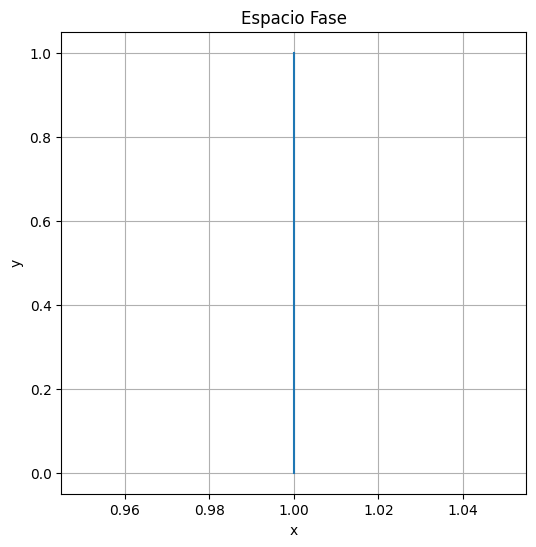

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Define las funciones que definen el sistema de ecuaciones diferenciales
def f(t, xy):
    x, y = xy
    dxdt = x - x**3
    dydt = -y
    return [dxdt, dydt]

# Define el rango de tiempo y las condiciones iniciales
t_span = (0, 10)  # Rango de tiempo
t_eval = np.linspace(*t_span, 1000)  # Puntos de evaluación
initial_conditions = [1, 1]  # Condiciones iniciales para x y y

# Resuelve las ecuaciones diferenciales
sol = solve_ivp(f, t_span, initial_conditions, t_eval=t_eval)



# Define las funciones del sistema de ecuaciones diferenciales
def equations(xy):
    x, y = xy
    eq1 = x - x**3
    eq2 = -y
    return [eq1, eq2]

# Encuentra los puntos fijos
initial_guesses = [(0, 0), (1, 0), (-1, 0)]  # Conjeturas iniciales para los puntos fijos
fixed_points = [fsolve(equations, guess) for guess in initial_guesses]

print("Puntos fijos encontrados:")
for point in fixed_points:
    print("x* =", point[0], ", y* =", point[1])



# Grafica el espacio fase
plt.figure(figsize=(6, 6))
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Espacio Fase')
plt.grid(True)
plt.show()


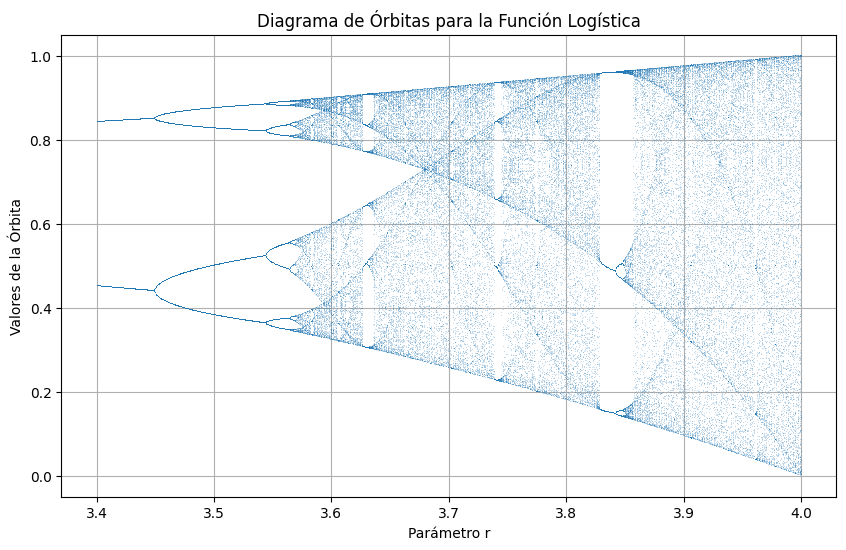

[0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4519632476261532,
 0.8421543994326706,
 0.451963247626153,
 0.8421543994326705,
 0.4

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(r, x):
    return r * x * (1 - x)

def plot_orbit_diagram(r_min, r_max, num_points_per_r=1000, num_iterations_discard=1000, num_iterations_display=100):
    # Lista para almacenar los valores de r y las órbitas correspondientes
    r_values = []
    orbit_values = []

    # Iterar sobre diferentes valores de r
    for r in np.linspace(r_min, r_max, num_points_per_r):
        # Iniciar la órbita con un valor inicial arbitrario
        x = 0.1
        # Descartar algunos puntos iniciales para que la órbita converja al atractor
        for _ in range(num_iterations_discard):
            x = logistic_map(r, x)

        # Almacenar los siguientes puntos de la órbita para mostrar en el diagrama
        for _ in range(num_iterations_display):
            x = logistic_map(r, x)
            r_values.append(r)
            orbit_values.append(x)

    # Graficar el diagrama de órbitas
    plt.figure(figsize=(10, 6))
    plt.plot(r_values, orbit_values, ',', alpha=0.25)
    plt.title('Diagrama de Órbitas para la Función Logística')
    plt.xlabel('Parámetro r')
    plt.ylabel('Valores de la Órbita')
    plt.grid(True)
    plt.show()
    return orbit_values
# Parámetros del sistema
r_min = 3.4  # Valor mínimo de r
r_max = 4.0  # Valor máximo de r

# Generar y graficar el diagrama de órbitas
plot_orbit_diagram(r_min, r_max)


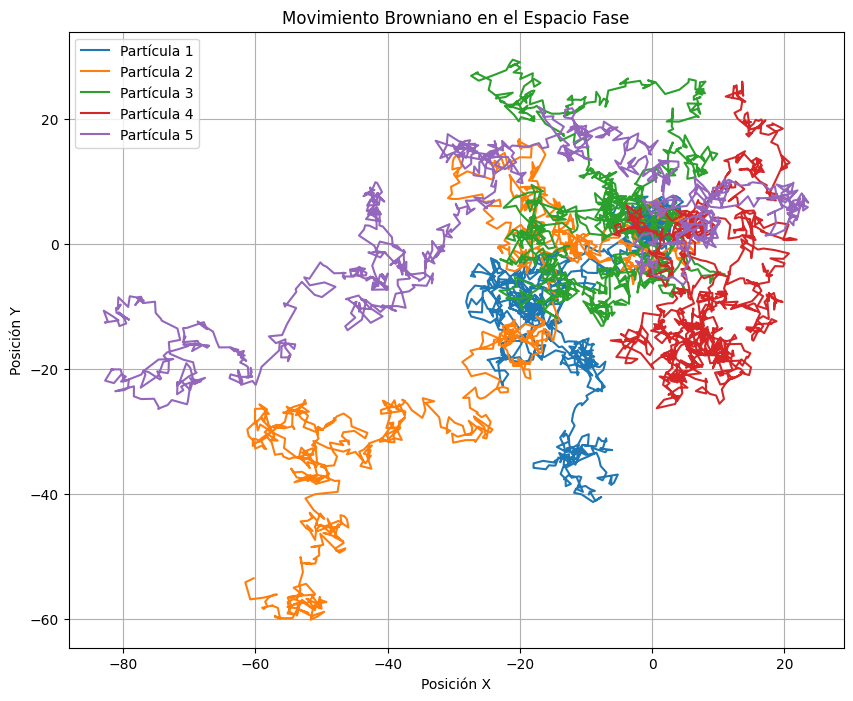

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del movimiento browniano
num_particulas = 5  # Número de partículas
num_pasos = 1000    # Número de pasos de tiempo
delta_t = 1         # Incremento de tiempo
delta_x = 1         # Magnitud del cambio en cada paso

# Inicialización de las posiciones
x = np.zeros((num_pasos, num_particulas))
y = np.zeros((num_pasos, num_particulas))

# Generar las trayectorias
for i in range(1, num_pasos):
    dx = np.random.normal(0, delta_x, num_particulas) * np.sqrt(delta_t)
    dy = np.random.normal(0, delta_x, num_particulas) * np.sqrt(delta_t)
    x[i] = x[i - 1] + dx
    y[i] = y[i - 1] + dy

# Graficar las trayectorias en el espacio fase
plt.figure(figsize=(10, 8))
for j in range(num_particulas):
    plt.plot(x[:, j], y[:, j], label=f'Partícula {j+1}')
plt.xlabel('Posición X')
plt.ylabel('Posición Y')
plt.title('Movimiento Browniano en el Espacio Fase')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\PC BULLOCK\AppData\Local\Temp\ipykernel_2208\1922918260.py:45: RuntimeWarning: invalid value encountered in divide
  plt.quiver(R, F, dR/magnitude, dF/magnitude, scale=50, color='r')


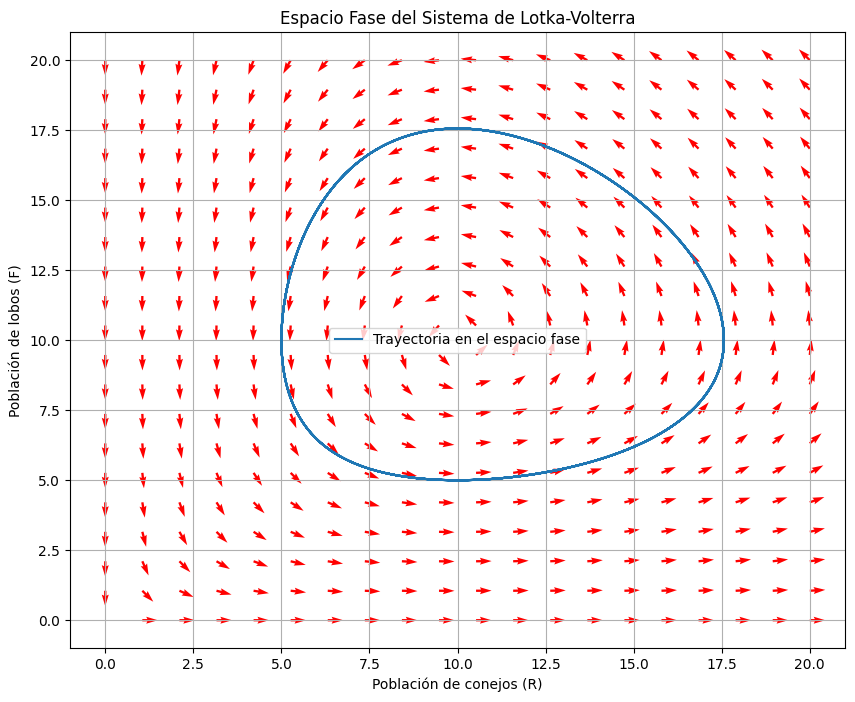

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros del modelo
a = 1.0  # Tasa de crecimiento de conejos
b = 0.1  # Tasa de depredación de conejos por lobos
c = 0.1  # Tasa de reproducción de lobos por consumo de conejos
e = 1.0  # Tasa de mortalidad de lobos

# Definición del sistema de ecuaciones diferenciales
def lotka_volterra(y, t, a, b, c, e):
    R, F = y
    dRdt = a * R - b * R * F
    dFdt = c * R * F - e * F
    return [dRdt, dFdt]

# Condiciones iniciales
R0 = 10
F0 = 5
y0 = [R0, F0]

# Tiempo para la simulación
t = np.linspace(0, 50, 1000)

# Resolución del sistema de ecuaciones diferenciales
sol = odeint(lotka_volterra, y0, t, args=(a, b, c, e))

# Graficar las trayectorias en el espacio fase
R, F = sol.T
plt.figure(figsize=(10, 8))
plt.plot(R, F, label='Trayectoria en el espacio fase')
plt.xlabel('Población de conejos (R)')
plt.ylabel('Población de lobos (F)')
plt.title('Espacio Fase del Sistema de Lotka-Volterra')
plt.grid(True)

# Graficar direcciones del campo vectorial
R_vals = np.linspace(0, 20, 20)
F_vals = np.linspace(0, 20, 20)
R, F = np.meshgrid(R_vals, F_vals)
dR = a * R - b * R * F
dF = c * R * F - e * F
magnitude = np.sqrt(dR**2 + dF**2)
plt.quiver(R, F, dR/magnitude, dF/magnitude, scale=50, color='r')

plt.legend()
plt.show()


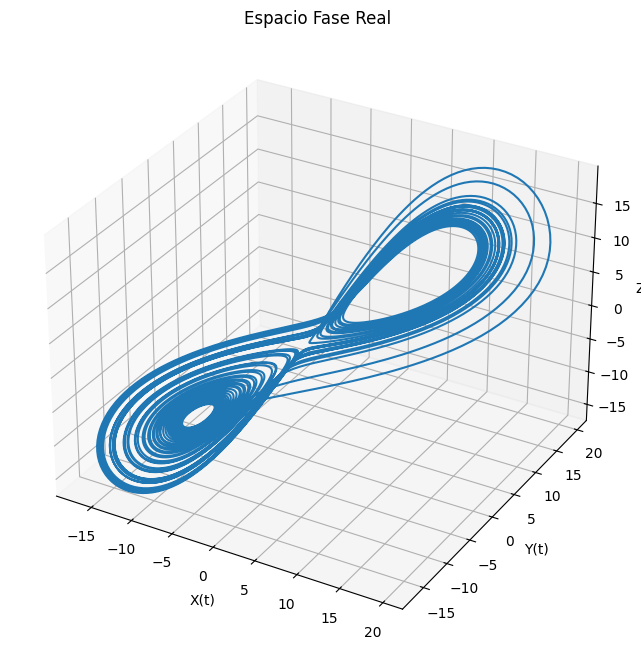

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición del sistema de Lorenz
def lorenz(t, state, sigma=10.0, beta=8/3, rho=28.0):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Condiciones iniciales y tiempo de integración
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solución del sistema de Lorenz
sol = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)
x, y, z = sol.y

# Usar solo una variable de la serie de tiempo (por ejemplo, x)
time_series = x

# Parámetros para el embebido
tau = 10  # Retardo de tiempo
m = 3     # Dimensión del espacio fase embebido

# Reconstrucción del espacio fase mediante el método de embebido
def time_delay_embedding(time_series, tau, m):
    n = len(time_series)
    embedded_data = np.zeros((n - (m - 1) * tau, m))
    for i in range(m):
        embedded_data[:, i] = time_series[i * tau: n - (m - 1) * tau + i * tau]
    return embedded_data

embedded_data = time_delay_embedding(time_series, tau, m)

# Graficar el espacio fase reconstruido
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(embedded_data[:,0], embedded_data[:,1], embedded_data[:, 2])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Espacio Fase Real')
plt.show()
